In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image 
import os 

In [2]:
hedegehog_dir = '고슴도치/'
hamster_dir = '햄스터/'
meerkat_dir = '미어캣/'

In [3]:
hedgehog_fnames = os.listdir(hedegehog_dir)
hamster_fnames = os.listdir(hamster_dir)
meerkat_fnames = os.listdir(meerkat_dir)

In [4]:
hedgehog_fnames

['1.png',
 '10.png',
 '100.png',
 '101.png',
 '102.png',
 '103.png',
 '104.png',
 '105.png',
 '106.png',
 '107.png',
 '108.png',
 '109.png',
 '11.png',
 '110.png',
 '111.png',
 '112.png',
 '113.png',
 '114.png',
 '115.png',
 '116.png',
 '117.png',
 '118.png',
 '119.png',
 '12.png',
 '120.png',
 '121.png',
 '122.png',
 '123.png',
 '124.png',
 '125.png',
 '126.png',
 '127.png',
 '128.png',
 '129.png',
 '13.png',
 '130.png',
 '131.png',
 '132.png',
 '133.png',
 '134.png',
 '135.png',
 '136.png',
 '137.png',
 '138.png',
 '139.png',
 '14.png',
 '140.png',
 '141.png',
 '142.png',
 '143.png',
 '144.png',
 '145.png',
 '146.png',
 '147.png',
 '148.png',
 '149.png',
 '15.png',
 '150.png',
 '151.png',
 '152.png',
 '153.png',
 '154.png',
 '155.png',
 '156.png',
 '157.png',
 '158.png',
 '159.png',
 '16.png',
 '160.png',
 '161.png',
 '162.png',
 '163.png',
 '164.png',
 '165.png',
 '166.png',
 '167.png',
 '168.png',
 '169.png',
 '17.png',
 '170.png',
 '171.png',
 '172.png',
 '173.png',
 '174.png',
 '

In [5]:
test_path = os.path.join(hedegehog_dir, hedgehog_fnames[50])
test_path

'고슴도치/144.png'

In [15]:
# 폴더 경로와 파일명, 이미지 사이즈를 매개변수로 받아서 이미지를 불러와
# 배열로 만들어주는 사용자 정의 함수 생성하기
def load_images(folder_path, file_names, img_size_shape=(224,224)) :
    # img_size_shape 설정 이유 : 신경망에 들어오는 입력데이터의 크기는 동일하게 맞춰줘야 함!
                        # 크롤링된 데이터는 데이터의 크기(가로/세로 픽셀수)가 제각각이다!
    images = []
    for i in file_names :
        # 카테고리 별, 각 파일명들의 전체 경로를 설정
        path = os.path.join(folder_path, i)
        # 이미지를 경로에 맞게 불러와서, 사이즈 변경시키고, 컬러이미지로 저장
        img = Image.open(path).resize(img_size_shape).convert('RGB')
        # 이미지를 배열로 변환시킨 데이터를 바로 비어있는 리스트에 추가
        images.append(np.array(img))
    # 리스트 자체도 배열로 변환시켜서 반환!
    return np.array(images)

In [16]:
train_hedgehog = load_images(hedegehog_dir, hedgehog_fnames)
train_hamster = load_images(hamster_dir, hamster_fnames)
train_meerkat = load_images(meerkat_dir, meerkat_fnames)

# 3은 3채널 즉, 컬러 이미지를 뜻함 


In [17]:
print(train_hedgehog.shape)
print(train_hamster. shape)

(400, 224, 224, 3)
(400, 224, 224, 3)


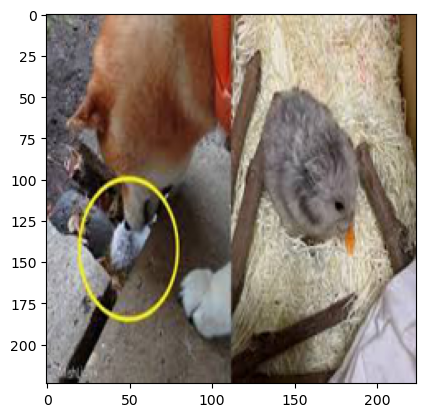

In [20]:
plt.imshow(train_hamster[40])

In [18]:
X = np.concatenate([train_hedgehog, train_hamster, train_meerkat])

In [19]:
# 정답 데이터 생성 
# 고슴도치 : 0, 햄스터:1, 미어캣 : 2 
y = np.array([0]*400 + [1]*400 + [2]*400)


In [21]:
print(X.shape)
print(y.shape)

(1200, 224, 224, 3)
(1200,)


In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 71)

In [24]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(960, 224, 224, 3)
(240, 224, 224, 3)
(960,)
(240,)


#### NPZ(Numpy Zip): 배열 데이터를 압축해서 저장한 파일 형식 
- 배열 데이터를 압축해서 저장한 파일 형식 


In [26]:
np.savez_compressed('animals.npz',    # 저장될 경로 및 
                   X_train = X_train, 
                    X_test = X_test, 
                    y_train = y_train,
                    y_test = y_test
                   )